# GAN's or Generative Adversarial Networks 

* Las GAN's es un sistema que se compone de dos redes neuronales

* El objetivo de las GAN's es la generación de nuevos datos a partir de datos subministrados al sistema. Estos sistemas cumplen con el mismo objetivo que las máquinas de Boltzmann. Entonces decimos que son sistemas generativos

* Las GAN's desde su creación (por Ian Goodfellow) han sido utilizadas para generar imágenes superrealistas, videos, imágenes 3D, datos sintéticos, etc. 

Entonces, nos surge la pregunta:

¿Por qué una máquina necesita generar datos?

***'Lo que no puedo crear, no lo puedo entender'***

Richard Feynmann


## ¿Cómo funcionan las GAN's?

La primer red neuronal la llamamos "The Generator"

Esta red como su nombre lo indica, se encarga de generar datos a partir de "ruido", de tal forma, esta red es capaz que apartir del ruido, procesar esa información por varias capas y después es capaz de sacar información útil. 

La segunda red la llamamos "The Discriminator"

El objetivo de esta red es discrimar datos "Falso" y datos "reales"

* Seguimos la explicación considerando el caso más simple, vamos a generar imágenes a partir de un conjunto de imágenes dadas. 

La arquitectura en gran escala de las GAN's es la siguiente:

<center>
    <img src="https://hackernoon.com/hn-images/0*Mwpzq1rqmc-2LJsx.
" width = "50%">
</center>

La arquitectura de la red generadora puede ser la siguiente:

<center>
    <img src="https://hackernoon.com/hn-images/1*7i9iCdLZraZkrMy1-KADrA.png
" width = "70%">
</center>

En este caso la deconvolución **NO** es una deconvolución (inversa de la convolución), más bien, en este caso, la deconvolución es una técnica que permite reconstruir mapas de activación de una de una red convolucional. 

Recordemos: 

<center>
    <img src="https://www.researchgate.net/profile/Takio_Kurita/publication/320748406/figure/fig1/AS:555719381274624@1509505233044/An-example-of-CNN-architecture.png" width = "70%">
</center>

A esta técnica de "deconvolución" la suelen llamar convolución transpuesta

<center>
    <img src="https://miro.medium.com/max/875/1*kOThnLR8Fge_AJcHrkR3dg.gif" width = 50%">
</center>

La arquitectura de la red discriminadora puede ser la siguiente:

<center>
    <img src="https://hackernoon.com/hn-images/1*QWEQqXmdTF285r1uS1t2eg.png" width = "70%">
</center>

* ¿Cómo se entrenan las GAN's?

<center>
    <img src="https://miro.medium.com/max/1800/1*TKr1dtcNgJCA8uYY1OhmSg.png" width = "70%">
</center>



## Algunas aplicaciones de la GAN's

Generación de fotografías de fotos humanas

<center>
    <img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Examples-of-Photorealistic-GAN-Generated-Faces.png" width = "50%">
</center>

Translación imagen-imagen

<center>
    <img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-Photographs-of-Daytime-Cityscapes-to-Nighttime-with-pix2pix.png" width = "50%">
</center>

Traducción texto-imagen

<center>
    <img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-Textual-Descriptions-and-GAN-Generated-Photographs-if-Birds-and-Flowers.png" width = "50%">
</center>

Traslación foto-emoji 

<center>
    <img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-Celebrity-Photographs-and-GAN-Generated-Emojis.png" width = "50%">
</center>

Predicción de acciones en un video

<center>
    <img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/06/Example-of-Video-Frames-Generated-with-a-GAN.png" width = "50%">
</center>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def show_generated(gan, n_images=5, codings_size=30):
    noise = tf.random.normal(shape=[n_images, codings_size])
    generator, discriminator = gan.layers
    generated_images = generator(noise)
    for image_index in generated_images:
        plot_image(image_index)
        plt.show()

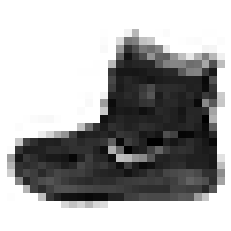

In [ ]:
plot_image(X_train[0, :, :])

In [ ]:
codings_size = 30

generator = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    tf.keras.layers.Dense(150, activation="selu"),
    tf.keras.layers.Dense(28 * 28, activation="sigmoid"),
    tf.keras.layers.Reshape([28, 28])
])

discriminator = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(150, activation="selu"), 
    tf.keras.layers.Dense(100, activation="selu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

gan = tf.keras.models.Sequential([generator, discriminator])

In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

batch_size = 100
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
def real_fake_offset(dataset, offset = 0.49):
    dataset = dataset.numpy()
    total_images = dataset.shape[0]
    n = np.where(dataset[:, 0] > offset)[0]
    real_images = len(np.array(n))
    return(real_images, total_images)

In [ ]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs = 5):
    generator, discriminator = gan.layers
    real_images = 0
    total_images = batch_size
    for epoch in tqdm(range(n_epochs)):
        print("Score {}/{}".format(real_images, total_images))
        for X_batch in dataset:
            X_batch = tf.cast(X_batch, 'float32')
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis = 0)
            y1 = tf.constant([[0.]]*batch_size + [[1.]]*batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]]*batch_size)
            discriminator.trainable = False
            images_result = discriminator(generator(noise))
            real_images, total_images = real_fake_offset(images_result)
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)                     # not shown
        plt.show()

  0%|          | 0/5 [00:00<?, ?it/s]

Score 0/100


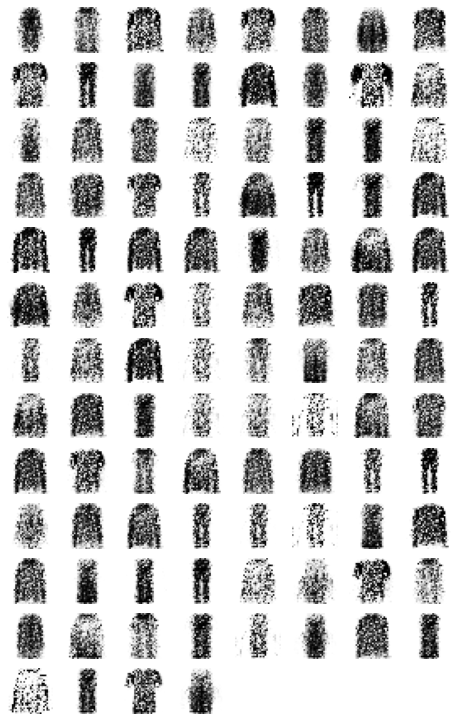

 20%|██        | 1/5 [00:20<01:23, 20.86s/it]

Score 6/100


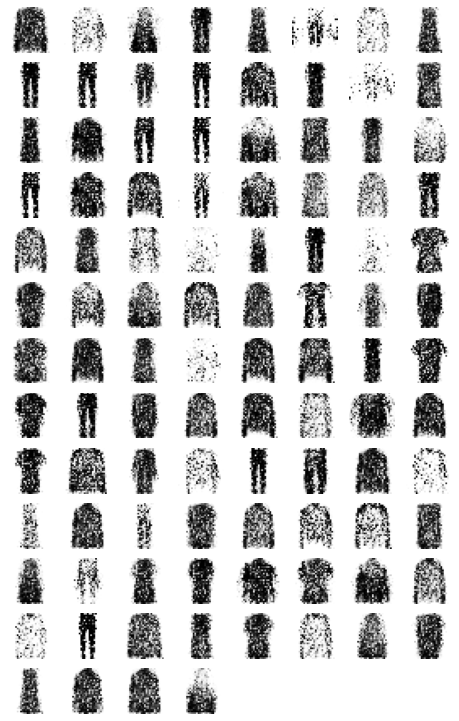

 40%|████      | 2/5 [00:41<01:02, 20.70s/it]

Score 30/100


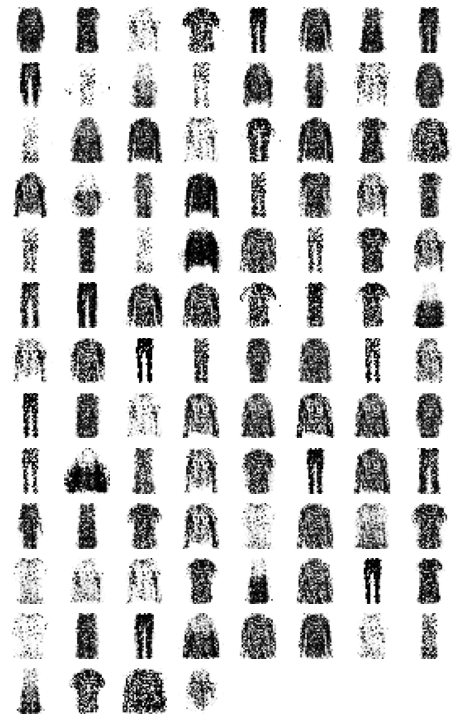

 60%|██████    | 3/5 [01:03<00:42, 21.08s/it]

Score 12/100


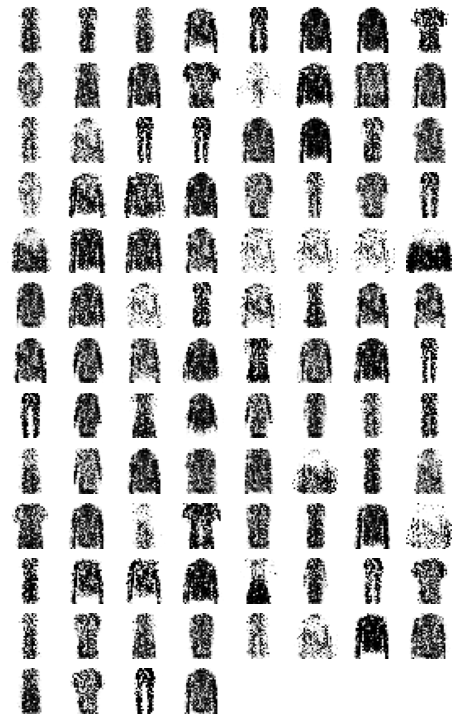

 80%|████████  | 4/5 [01:23<00:20, 20.92s/it]

Score 18/100


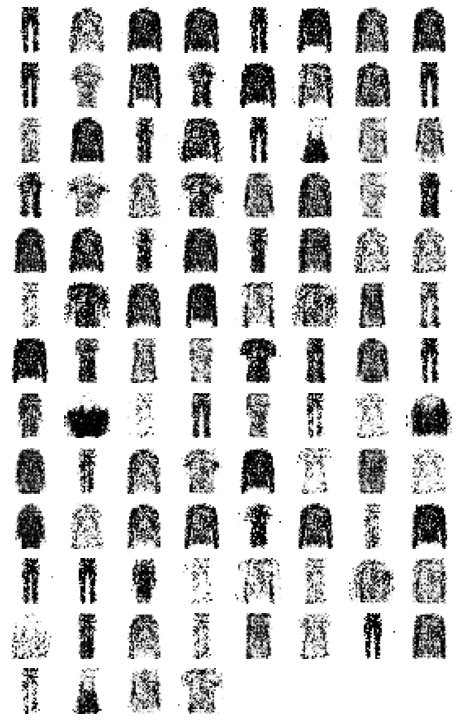

100%|██████████| 5/5 [01:43<00:00, 20.76s/it]


In [ ]:
train_gan(gan, dataset, batch_size, codings_size)

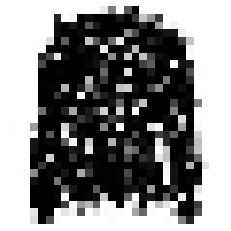

In [ ]:
show_generated(gan, n_images=1)